In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['bolungarvik', 'palana', 'ushuaia', 'chuy', 'east london', 'busselton', 'rikitea', 'katsuura', 'baracoa', 'shenzhen', 'wanning', 'upernavik', 'mangrol', 'leningradskiy', 'khani', 'taolanaro', 'saint anthony', 'skelleftea', 'boyolangu', 'bow island', 'anadyr', 'port alfred', 'hermanus', 'georgetown', 'dikson', 'barrow', 'dicabisagan', 'punta arenas', 'ribeira grande', 'aklavik', 'qaanaaq', 'nantucket', 'saskylakh', 'thinadhoo', 'puerto ayora', 'polje', 'bluff', 'porto novo', 'faanui', 'orlik', 'svetlyy', 'mnogovershinnyy', 'jamestown', 'kodiak', 'shimoda', 'mahebourg', 'khatanga', 'mataura', 'pevek', 'kudahuvadhoo', 'kapaa', 'college', 'jurm', 'attawapiskat', 'azad shahr', 'arraial do cabo', 'fortuna', 'sangueya', 'kisesa', 'atuona', 'ilulissat', 'safranbolu', 'nanortalik', 'safaqis', 'guerrero negro', 'provideniya', 'pisco', 'malindi', 'thompson', 'ballina', 'illoqqortoormiut', 'lavrentiya', 'kaitangata', 'sitka', 'cape town', 'zhezkazgan', 'kavaratti', 'vaitupu', 'new norfolk', 'cons

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
cities_500 = ['ijaki', 'bredasdorp', 'kalmar', 'meyungs', 'torbay', 'constitucion', 'burns lake', 'airai', 'punta arenas', 'caravelas', 'borovskoy', 'hilo', 'albany', 'tasiilaq', 'lisala', 'butaritari', 'viligili', 'atuona', 'burlington', 'saskylakh', 'jamestown', 'fort nelson', 'fernie', 'san-pedro', 'bonavista', 'mys shmidta', 'sentyabrskiy', 'ribeira grande', 'flinders', 'avarua', 'tiksi', 'silves', 'petropavlovsk-kamchatskiy', 'uptar', 'cape town', 'yatou', 'ilulissat', 'bluff', 'cherskiy', 'tarata', 'honiara', 'new norfolk', 'hobart', 'hermanus', 'cherdyn', 'grindavik', 'arraial do cabo', 'kapaa', 'belushya guba', 'vaini', 'rikitea', 'boras', 'mataura', 'watertown', 'hirara', 'kruisfontein', 'kenora', 'kirakira', 'bulawayo', 'port alfred', 'sambava', 'kimbe', 'port hardy', 'ponnani', 'geraldton', 'dikson', 'saint-philippe', 'palabuhanratu', 'ponta delgada', 'basco', 'alice town', 'wucheng', 'clyde river', 'krasnaya gorka', 'chokurdakh', 'nikolskoye', 'castro', 'puerto ayora', 'vilhena', 'amderma', 'murgab', 'beringovskiy', 'cidreira', 'camacari', 'areka', 'beloha', 'zhicheng', 'egvekinot', 'soyo', 'kroya', 'esperance', 'hasaki', 'yinchuan', 'saint-augustin', 'busselton', 'yellowknife', 'syracuse', 'coihaique', 'chernyshevskiy', 'anaco', 'klaksvik', 'oktyabrskiy', 'guerrero negro', 'carlsbad', 'sorland', 'lira', 'nuuk', 'dongobesh', 'ponta do sol', 'attawapiskat', 'tuktoyaktuk', 'bilara', 'fort dodge', 'qaanaaq', 'deputatskiy', 'taolanaro', 'krasnoyarsk-45', 'douglas', 'paralimni', 'kashi', 'rock sound', 'florence', 'saldanha', 'iwaki', 'bengkulu', 'kerema', 'strezhevoy', 'kavieng', 'opelousas', 'hendek', 'kapoeta', 'hithadhoo', 'chumikan', 'nkan', 'lebu', 'port elizabeth', 'acapulco', 'mountain home', 'talara', 'itarema', 'andros town', 'fort saint james', 'srednekolymsk', 'hambantota', 'faanui', 'sistranda', 'bairiki', 'pisco', 'port-cartier', 'east london', 'diego de almagro', 'ancud', 'bohdan', 'quanzhou', 'fort saint john', 'victoria', 'namatanai', 'cuamba', 'bethel', 'grand river south east', 'menongue', 'barrow', 'aykhal', 'san patricio', 'sao joao da barra', 'bronnoysund', 'georgetown', 'carnarvon', 'merauke', 'cabo san lucas', 'teguise', 'goderich', 'te anau', 'kaitangata', 'gighera', 'doctor pedro p. pena', 'santa cruz', 'pevek', 'rorvik', 'talaya', 'chicama', 'atambua', 'ntungamo', 'labuhan', 'ribas do rio pardo', 'amapa', 'upernavik', 'ahipara', 'saleaula', 'maryborough', 'linxia', 'harper', 'bam', 'vila franca do campo', 'nizhneyansk', 'sao pedro', 'labuan', 'svirsk', 'port hedland', 'awbari', 'saint-pierre', 'mehamn', 'borisovka', 'arboletes', 'husavik', 'lakes entrance', 'ushuaia', 'orlovka', 'mar del plata', 'atbasar', 'kahului', 'miramar', 'solovetskiy', 'bafq', 'cherat', 'boz', 'bolungarvik', 'tondano', 'codrington', 'boa vista', 'roald', 'yanchukan', 'korla', 'tecoanapa', 'jacqueville', 'lasa', 'kayes', 'kamenskoye', 'half moon bay', 'thompson', 'salalah', 'samarai', 'iqaluit', 'omaruru', 'provideniya', 'puerto carreno', 'paita', 'vila velha', 'gravdal', 'santander jimenez', 'vuktyl', 'khatanga', 'barentsburg', 'rawson', 'uglich', 'zhezkazgan', 'marawi', 'wanning', 'ust-tsilma', 'anloga', 'yumen', 'saint george', 'barentu', 'sosnovo-ozerskoye', 'bud', 'lavrentiya', 'marolambo', 'chuy', 'laguna', 'caarapo', 'andapa', 'touros', 'salekhard', 'vizinga', 'padang', 'hofn', 'kodiak', 'binzhou', 'severo-kurilsk', 'mount gambier', 'roros', 'rafai', 'vanavara', 'sinkat', 'vikhorevka', 'samusu', 'krasnomayskiy', 'kalabo', 'pacific grove', 'north bend', 'puerto escondido', 'bambous virieux', 'tabiauea', 'morehead', 'usinsk', 'dunedin', 'koppang', 'longyearbyen', 'kalmunai', 'nome', 'sinjar', 'mullaitivu', 'mandalgovi', 'sao joao da ponte', 'jatiroto', 'khorinsk', 'lyubytino', 'matara', 'ilheus', 'avera', 'mapiripan', 'mogadishu', 'port macquarie', 'pitimbu', 'san andres', 'norman wells', 'meulaboh', 'maldonado', 'yantikovo', 'matamoros', 'komsomolskiy', 'illoqqortoormiut', 'arys', 'gaurela', 'yulara', 'tazovskiy', 'chabahar', 'beitbridge', 'kindu', 'lompoc', 'bara', 'vaitupu', 'mahebourg', 'ornskoldsvik', 'ushtobe', 'polunochnoye', 'coquimbo', 'uray', 'tarudant', 'ulaangom', 'taltal', 'mitzic', 'frontino', 'cortez', 'liaozhong', 'mayo', 'limbang', 'anadyr', 'port blair', 'rawannawi', 'west bay', 'tarakan', 'plettenberg bay', 'hihifo', 'cayenne', 'tilichiki', 'aguimes', 'ambilobe', 'keuruu', 'conde', 'namibe', 'ust-maya', 'mbandaka', 'mrirt', 'adrar', 'biak', 'bargal', 'smithers', 'lorengau', 'daru', 'kamen-na-obi', 'nabisar', 'brae', 'ahuimanu', 'tuatapere', 'isangel', 'rudbar', 'ballina', 'mwinilunga', 'mandan', 'nagato', 'westport', 'kadykchan', 'orocue', 'ngunguru', 'richards bay', 'santa isabel do rio negro', 'omboue', 'quatre cocos', 'sturgis', 'ca mau', 'souillac', 'mikuni', 'preobrazheniye', 'brookings', 'dolbeau', 'hami', 'pandan', 'calabozo', 'izumo', 'san quintin', 'opuwo', 'canchungo', 'hobyo', 'bitung', 'lolua', 'sukhodol', 'hue', 'kabinda', 'port keats', 'vestmannaeyjar', 'xining', 'vastseliina', 'kholm-zhirkovskiy', 'nikel', 'escalerillas', 'maceio', 'makakilo city', 'nianzishan', 'erenhot', 'akureyri', 'quesnel', 'noumea', 'novyy urgal', 'vargem grande do sul', 'atar', 'fukue', 'alushta', 'aklavik', 'kampot', 'seoul', 'artyk', 'fairbanks', 'loyga', 'san luis', 'grand-lahou', 'holme', 'aswan', 'potsdam', 'nhamunda', 'dingle', 'barawe', 'portales', 'warrington', 'yakeshi', 'kentau', 'alofi', 'gornyy', 'remanso', 'narsaq', 'porterville', 'carson city', 'ossora', 'oussouye', 'asau', 'mareeba', 'muzhi', 'nivala', 'goundam', 'bosaso', 'pecos', 'sungaipenuh', 'mocuba', 'pangai', 'hvolsvollur', 'rio gallegos', 'gurskoye', 'larsnes', 'jalu', 'baruun-urt', 'sitka', 'grand gaube', 'caluquembe', 'banda aceh', 'ust-kalmanka', 'west wendover', 'shingu', 'cockburn town', 'kielce', 'tual', 'dicabisagan', 'barranquilla', 'christchurch', 'lac du bonnet', 'sirajganj', 'baykit', 'belle fourche', 'dalvik', 'marystown', 'adwa', 'bandarbeyla', 'kupang', 'yozgat', 'wingham', 'ixtapa', 'walvis bay', 'aflu', 'nishihara', 'port antonio', 'pahrump', 'lauro muller', 'rognan', 'charters towers', 'kyshtovka', 'lujan', 'do rud', 'nadym', 'blythe', 'filadelfia', 'ko samui', 'olinda', 'vilyuysk', 'suba', 'iskateley', 'comodoro rivadavia', 'pamanukan', 'guane', 'murmashi', 'san ignacio', 'parabel', 'alamogordo', 'huarmey', 'talnakh', 'mendoza', 'churachandpur', 'buala', 'maralal', 'marsh harbour', 'teya', 'bichena', 'nyurba', 'victor harbor', 'palmer', 'micheldorf', 'sassandra', 'auki', 'vostok', 'okhotsk', 'pombia', 'bocaiuva', 'yining', 'lander', 'ulyanovo', 'gumdag', 'honningsvag', 'la ronge', 'ayan', 'kavaratti', 'ouadda', 'labutta', 'zhanaozen', 'lulea', 'prince rupert', 'borger', 'keetmanshoop', 'lagoa', 'nexo', 'skibbereen', 'mayna', 'angostura', 'armacao dos buzios', 'byron bay', 'port-gentil', 'great yarmouth', 'katsuura', 'karratha', 'manadhoo', 'berlevag', 'manzil salim', 'fortuna', 'arnprior', 'arman', 'nizhneangarsk', 'gorlice', 'bubaque', 'eyl', 'alta floresta', 'bilma', 'ilanskiy', 'jinchang', 'bure', 'isabela', 'kozhva', 'southbridge', 'kuusamo', 'buariki', 'budacu de jos', 'haibowan', 'umm kaddadah', 'mildura', 'shibetsu', 'glyadyanskoye', 'leningradskiy', 'tsentralnyy', 'fort-shevchenko', 'tura', 'harer', 'qatana', 'doka', 'skelleftea', 'whangarei', 'wasilla', 'bumba', 'monrovia', 'svetlaya', 'betsiamites', 'russell', 'ostrovnoy', 'la palma', 'lebyazhye', 'ouesso', 'gao', 'galgani', 'tokat', 'kismayo', 'woodstock', 'nemuro', 'sisimiut']

In [5]:
cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taiwan"]

# set up lists to hold reponse info
lat = []
temp = []
hum =[]
speed = []
clouds = []


# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])
    hum.append(response['main']['humidity'])
    speed.append(response['wind']['speed'])
    clouds.append(response['clouds']['all'])
    

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")
print(f"The humidity information received is: {hum}")
print(f"The wind speed information received is: {speed}")
print(f"The clouds information received is: {clouds}")

print(response)

The latitude information received is: [48.85, 51.51, 59.91, 39.91, 19.01, 14.6, 40.71, 47.61, 32.77, 24]
The temperature information received is: [9.78, 12.86, 8.32, 31.56, 29, 31.26, 26.7, 14.87, 28.22, 31.46]
The humidity information received is: [87, 82, 97, 48, 83, 70, 57, 93, 23, 66]
The wind speed information received is: [2.1, 3.6, 0.18, 0.74, 2.1, 3.6, 2.6, 3.1, 5.1, 4.1]
The clouds information received is: [16, 100, 0, 33, 40, 75, 1, 90, 1, 75]
{'coord': {'lon': 121, 'lat': 24}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 31.46, 'feels_like': 34.6, 'temp_min': 31, 'temp_max': 31.67, 'pressure': 1012, 'humidity': 66}, 'visibility': 10000, 'wind': {'speed': 4.1, 'deg': 170}, 'clouds': {'all': 75}, 'dt': 1591758030, 'sys': {'type': 1, 'id': 7941, 'country': 'TW', 'sunrise': 1591736875, 'sunset': 1591785793}, 'timezone': 28800, 'id': 1668284, 'name': 'Taiwan', 'cod': 200}


In [6]:
# create a data frame from cities
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp,
    "wind speed": speed,
    "humidity": hum,
    "Cloudiness": clouds
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,temp,wind speed,humidity,Cloudiness
0,Paris,48.85,9.78,2.10,87,16
1,London,51.51,12.86,3.60,82,100
2,Oslo,59.91,8.32,0.18,97,0
3,Beijing,39.91,31.56,0.74,48,33
4,Mumbai,19.01,29.00,2.10,83,40
5,Manila,14.60,31.26,3.60,70,75
6,New York,40.71,26.70,2.60,57,1
7,Seattle,47.61,14.87,3.10,93,90
8,Dallas,32.77,28.22,5.10,23,1
9,Taiwan,24.00,31.46,4.10,66,75


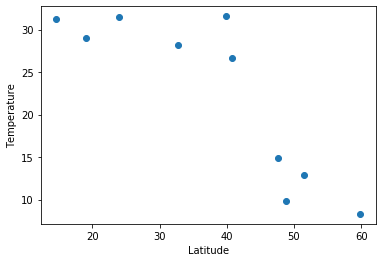

In [16]:
# Create a Scatter Plot for temperature vs latitude
x_values_lat = weather_data['lat']
y_values_temp = weather_data['temp']
plt.scatter(x_values_lat,y_values_temp)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

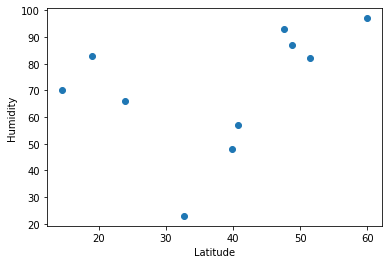

In [17]:
# Create a Scatter Plot for Humidity vs latitude
x_values_lat = weather_data['lat']
y_values_hum = weather_data['humidity']
plt.scatter(x_values_lat,y_values_hum)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

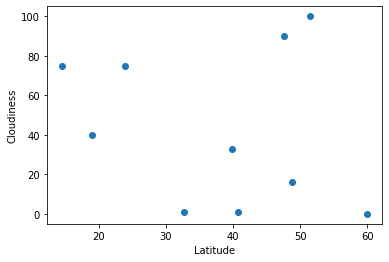

In [18]:
# Create a Scatter Plot for Cloudiness vs latitude
x_values_lat = weather_data['lat']
y_values_cloud = weather_data['Cloudiness']
plt.scatter(x_values_lat,y_values_cloud)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

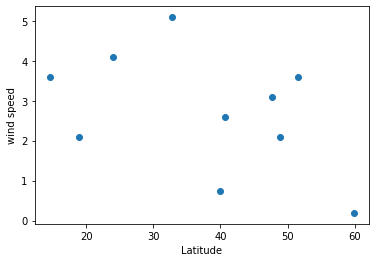

In [19]:
# Create a Scatter Plot for wind vs latitude
x_values_lat = weather_data['lat']
y_values_speed = weather_data['wind speed']
plt.scatter(x_values_lat,y_values_speed)
plt.xlabel('Latitude')
plt.ylabel('wind speed')
plt.show()

In [20]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_lat, y_values_temp)

# Get regression values
regress_values = x_values_lat * slope + intercept
print(regress_values)

0    16.378362
1    14.916445
2    10.299865
3    21.291723
4    32.778215
5    35.201920
6    20.852049
7    17.059858
8    25.215817
9    30.035747
Name: lat, dtype: float64


In [21]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.55x +43.23


The r-squared is: -0.8483829342381571


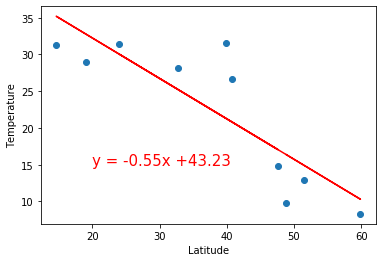

In [22]:
# Create Plot
plt.scatter(x_values_lat,y_values_temp)
plt.plot(x_values_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value 
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

y = 0.56x +49.21
The r-squared is: 0.3682892454776247


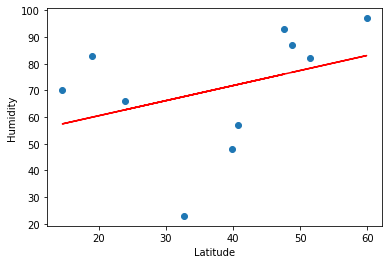

In [23]:
# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_lat, y_values_hum)

# Get regression values
regress_values = x_values_lat * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values_lat,y_values_hum)
plt.plot(x_values_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value 
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()


y = 0.56x +49.21
The r-squared is: 0.3682892454776247


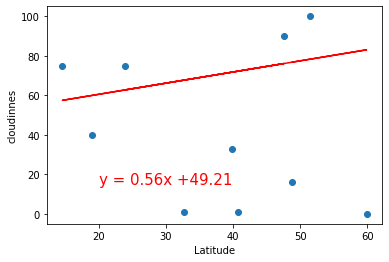

In [25]:
# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_lat, y_values_hum)

# Get regression values
regress_values = x_values_lat * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values_lat,y_values_cloud)
plt.plot(x_values_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('cloudinnes')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value 
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()
